#Telco's Customer Data Exploratory Analysis

By Bruno Batista

Analysis of [Telco's](http://telco.com.br/) customer database, with information about the attributes of its customers.

The intention is to predict customers with greater potential to leave the company.

Source: https://www.kaggle.com/bbatista/telco-exploratory-analysis

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Lab EDA/telco.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Clean and Transform Data!

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

Nice! The dataset has no duplicates, and no missing values.

We have more than 7000 rows and 21 attributes (columns)

However, some data that should be categorical are saved as number. Let's fix this.

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


***SeniorCitzen***

It's originally 0 = No, 1 = Yes, would like to convert from numeric to object, so it would not do arithmetic operation.

In [ ]:
# SeniorCitizen
df['SeniorCitizen'] = df.SeniorCitizen.astype('object')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Done ! Now the SeniorCitizen column, which indicates whether the customer is elderly or not, through a dummy variable (0 and 1), is properly saved as a qualitative variable.

We need to change the column *** TotalCharges *** to numerical as it refers to the total amount of revenue generated by the client. We'll do this using the _to_numeric () _ function of pandas.

The _errors = 'coerce'_ parameter turns the records into which the conversion could not be converted to values ​​of type NaN.

In [ ]:
df.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [ ]:
df['TotalCharges'].sort_values().head(20)

936            
3826           
4380           
753            
5218           
3331           
6754           
6670           
1340           
488            
1082           
105       100.2
4459     100.25
1723     100.35
2124      100.4
2208      100.8
460       100.9
3883     1001.2
2799     1001.5
5337    1003.05
Name: TotalCharges, dtype: object

The problem is we have 'blanks' instead of null.

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The conversion generated 11 null values, we will fill them with the result of multiplying the tenure and MonthlyCharges columns. Since the first represents the number of months that the customer was in the company, and the second indicates the amount paid per month.

In [ ]:
df.TotalCharges.isnull().sum()

11

In [ ]:
df.TotalCharges.fillna(value = df.tenure *  df.MonthlyCharges, inplace = True)

In [ ]:
df.TotalCharges.isnull().sum()

0

Problem solved !

Now that all the variables are ok, we can start exploring the data. Let's try to understand which customers spend more, which ones usually stay longer in the company among other information that may be interesting and lead us to some insights.

Let's start by observing a statistical summary of the numerical variables, which are:

* tenure: Period in months that customers stay in the company
* MonthlyCharge: Value of the monthly payment paid by the customer
* TotalCharges: Total amount paid by the customer

## Exploratory Analysis

In [ ]:
df.describe().round()

,tenure,MonthlyCharges,TotalCharges
count,7043.0,7043.0,7043.0
mean,32.0,65.0,2280.0
std,25.0,30.0,2267.0
min,0.0,18.0,0.0
25%,9.0,36.0,399.0
50%,29.0,70.0,1395.0
75%,55.0,90.0,3787.0
max,72.0,119.0,8685.0


* Half of the clients remain in the company for more than 29 months (just over two years);
* The average amount per month \$65.
* The average total revenue generated per customer is \$2280.


*** Let's look at how the relationships between these variables occur.***

Text(0.5, 1.0, 'Relationship between loyalty months and total revenue')

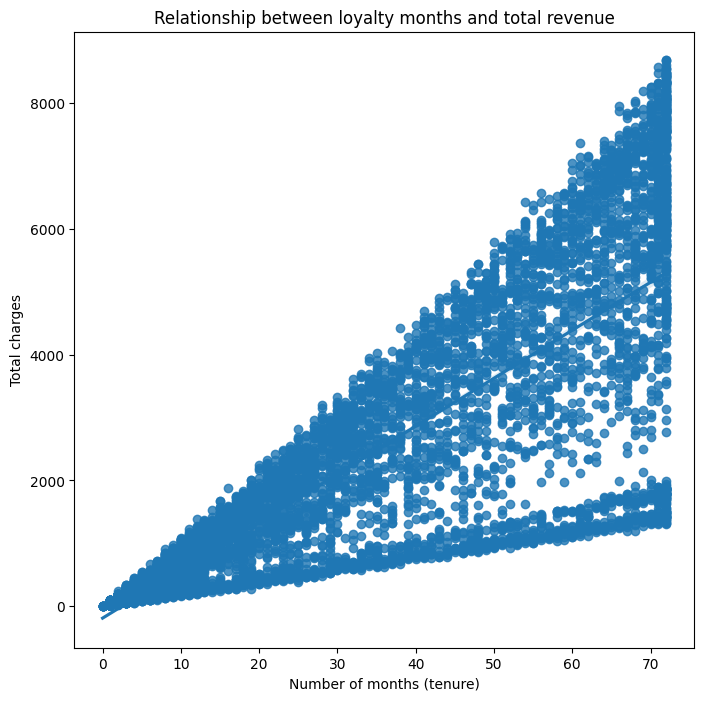

In [ ]:
numerics = df[['tenure','MonthlyCharges', 'TotalCharges', 'Churn']]

plt.figure(figsize = (8,8))

sns.regplot(x = 'tenure', y = 'TotalCharges', data = numerics)
plt.xlabel('Number of months (tenure)')
plt.ylabel('Total charges')

plt.title('Relationship between loyalty months and total revenue')

Text(0.5, 1.0, 'Relationship between monthly fee and total revenue')

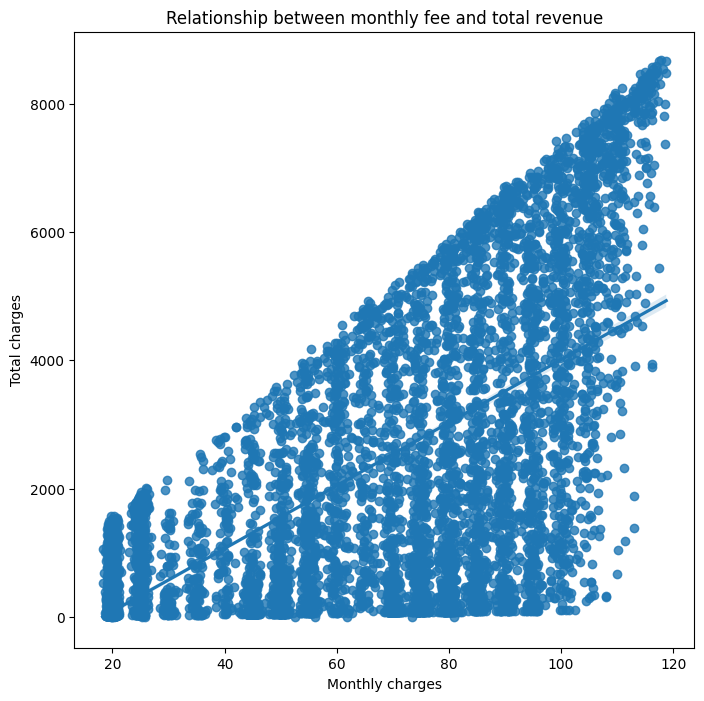

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8, 8))


sns.regplot(x = 'MonthlyCharges', y = 'TotalCharges', data = numerics, ax=ax)

ax.set_xlabel('Monthly charges')
ax.set_ylabel('Total charges')

ax.set_title('Relationship between monthly fee and total revenue')

But monthly charges are part of total charges, they should be correlated anyway.

<Figure size 1500x1000 with 0 Axes>

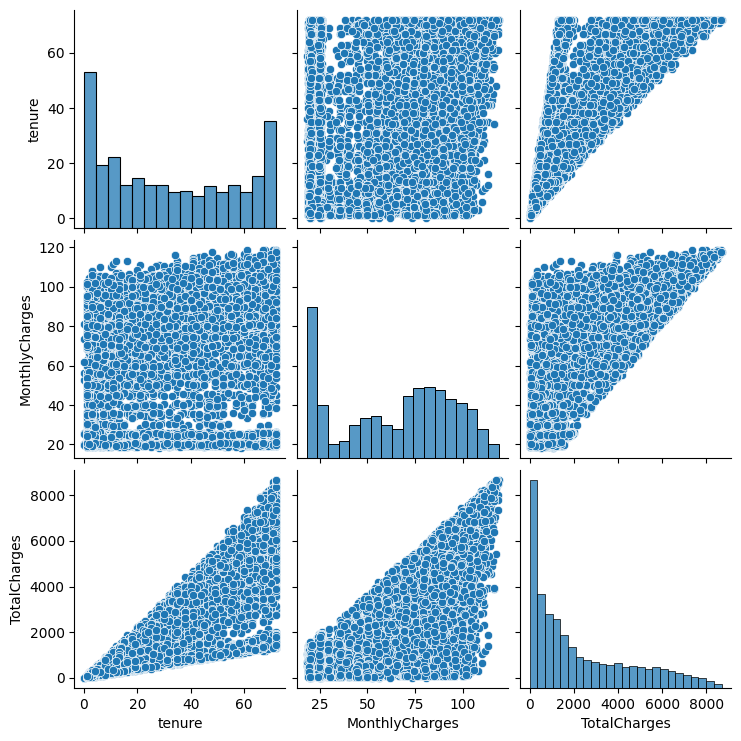

In [ ]:
plt.figure(figsize = (15,10))
pp = sns.pairplot(numerics)

Text(0.5, 1.0, 'Box Plot of Total Payments X Months of Loyalty')

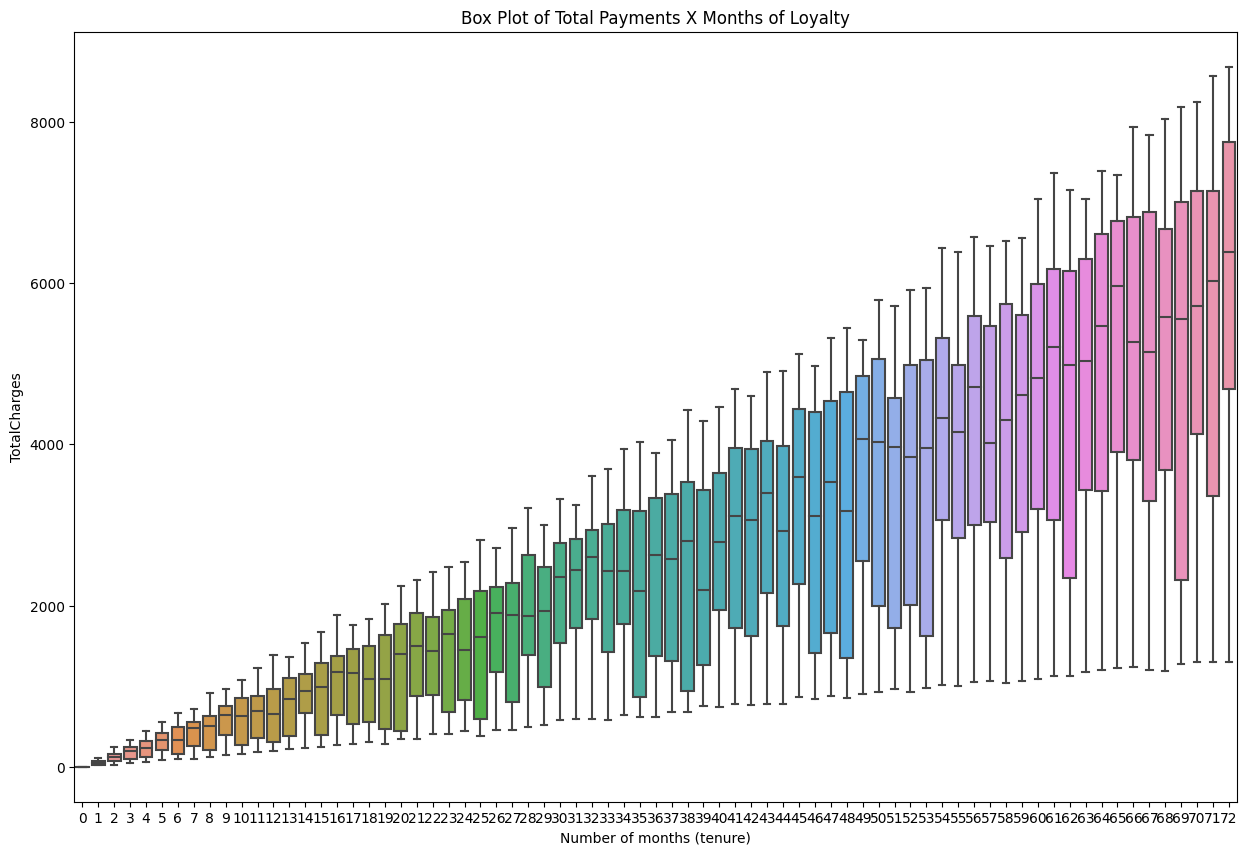

In [ ]:
plt.figure(figsize = (15,10))

bp = sns.boxplot(x = 'tenure', y = 'TotalCharges', data = df)

bp.set_xlabel('Number of months (tenure)')

plt.title('Box Plot of Total Payments X Months of Loyalty')

<Axes: xlabel='tenure', ylabel='count'>

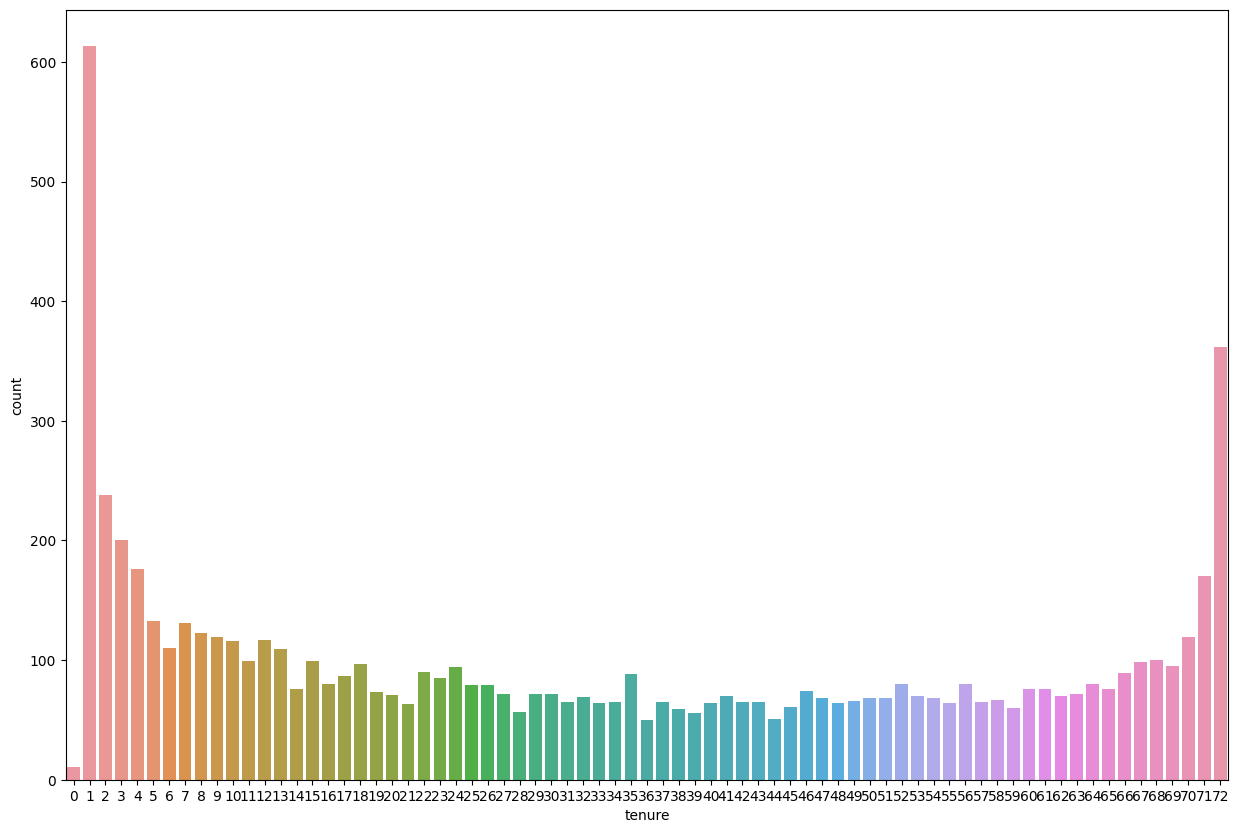

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(x=df['tenure'])

Above we have just explored the relationships between the time of home and the total value of expenses. They are linear as you would expect. That is, the longer the customer stays with us, the greater your total spend.

We also observed the linear relationship between the monthly value and total revenue. Customers with higher monthly value, represent higher revenue.

We observe that there is no relation to the months of the clients, and the increase of the monthly payments. Many clients remain for a long time without switching to new services; in contrast, some already come with more expensive plans.

And through boxplot we have seen that, in general, the dataset does not have outliers.

***Now let's explore the categorical variables. From here, we'll take into account the variable 'Churn' in all our views. This variable indicates whether the customer has left the company or not. Our target variable.***

In [ ]:
df.describe(include = 'object')

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


Quickly, in this picture we can already observe:

* Most customers are not Senior;
* The most popular internet service is fiber optics;
* Most customers prefer not to receive printed accounts;
* The most popular form of payment is the electronic payment




### SeniorCitizen

#### Does the age group influence the escape of customers?

In [ ]:
pd.crosstab(df.Churn, df.SeniorCitizen,
            margins = True)
# margins - Add row/column margins (subtotals)

SeniorCitizen,0,1,All
Churn,,,
No,4508,666,5174
Yes,1393,476,1869
All,5901,1142,7043


In [ ]:
pd.crosstab(df.Churn, df.SeniorCitizen,
            margins = True, normalize='columns')

SeniorCitizen,0,1,All
Churn,,,
No,0.763938,0.583187,0.73463
Yes,0.236062,0.416813,0.26537


<Axes: xlabel='SeniorCitizen', ylabel='count'>

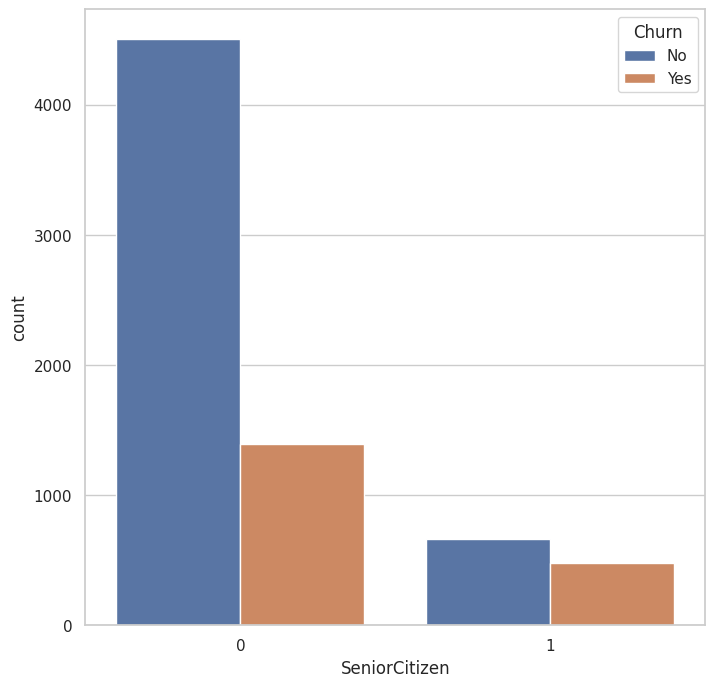

In [ ]:
plt.figure(figsize = (8,8))
sns.set(style = 'whitegrid')

sns.countplot(x=df.SeniorCitizen, hue = df.Churn )

Proportionally speaking, the volume of older people leaving the company is much higher than the volume of non-elderly.

Does this indicate a dependency relationship? Is it worth considering to investigate this relationship more closely? Or was it mere chance? A chi-square test can help us find out if this assignment is statistically significant.

Just for curiosity, what is the monthly average between young and old?

In [ ]:
senior_mean = df.groupby('SeniorCitizen').mean()
senior_mean.round()

<ipython-input-28-77ce1fb1b456>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  senior_mean = df.groupby('SeniorCitizen').mean()


,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,,,
0,32.0,62.0,2177.0
1,33.0,80.0,2810.0


Text(0.5, 1.0, 'Total Revenue by Seniors and Non-Seniors')

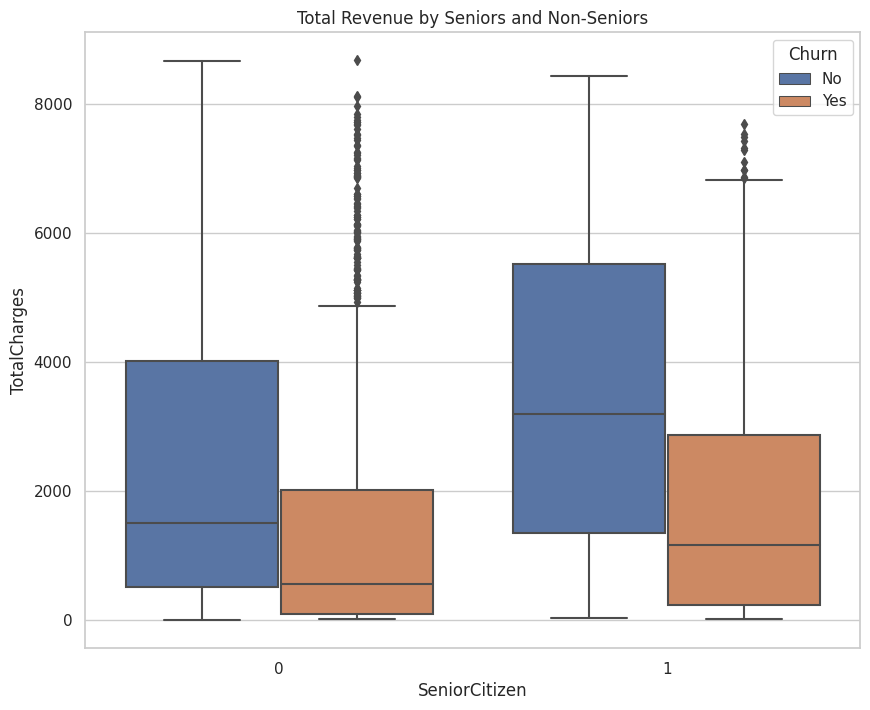

In [ ]:
plt.figure(figsize = (10,8))

sns.set(style = 'whitegrid')
sns.boxplot(x = df.SeniorCitizen, y = df.TotalCharges, hue = df.Churn)

plt.title('Total Revenue by Seniors and Non-Seniors')

In [ ]:
df.SeniorCitizen.value_counts(normalize = True)

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

Based on the above comparisons:

* Although they represent only 16% of clients, the elderly spend more in the company: It has a monthly average higher, leave more revenue and has a higher fidelity average. However, as we have seen, it has a much higher rate of churning than the young public. The graphic makes this even clearer.

These numbers make sense. Older people spend more time at home, because they are retired or taking lighter lives, so they consume more television, which leads them to sign more complete and consequently more expensive packages.

Based on these data, we could recommend a deeper analysis to understand the reason for this churning rate and propose actions to increase retention of this public and to attract them.

This analysis has already shown us some very relevant insights and this considering only the variable relative to age ....


### Gender

<Axes: xlabel='gender', ylabel='count'>

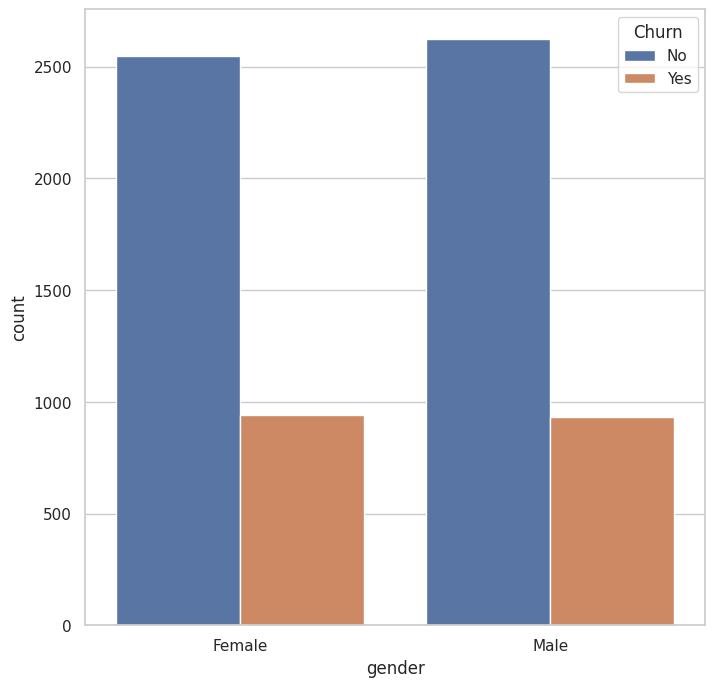

In [ ]:
plt.figure(figsize = (8,8))
sns.set(style = 'whitegrid')
sns.countplot(x=df.gender, hue = df.Churn)

In [ ]:
gender_mean = df.groupby(by = 'gender').mean().round()
gender_mean

<ipython-input-32-a891430bfab2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_mean = df.groupby(by = 'gender').mean().round()


,tenure,MonthlyCharges,TotalCharges
gender,,,
Female,32.0,65.0,2280.0
Male,32.0,64.0,2280.0


There is no behavior difference between women and men.

### Lets investigate the Partner variable, that indicates if the customer has any relationship partner.

<Axes: xlabel='Partner', ylabel='count'>

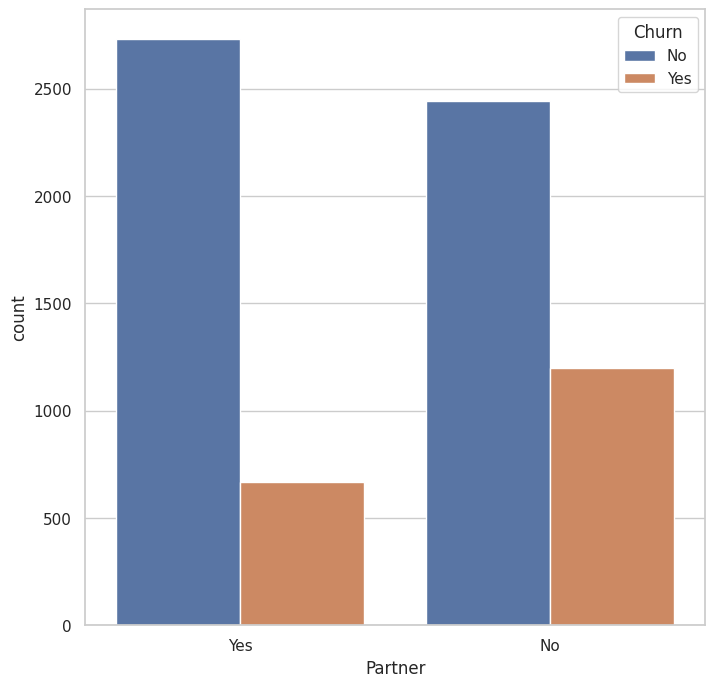

In [ ]:
plt.figure(figsize = (8,8))
sns.set(style = 'whitegrid')
sns.countplot(x=df.Partner, hue = df.Churn)

<Axes: xlabel='Partner', ylabel='TotalCharges'>

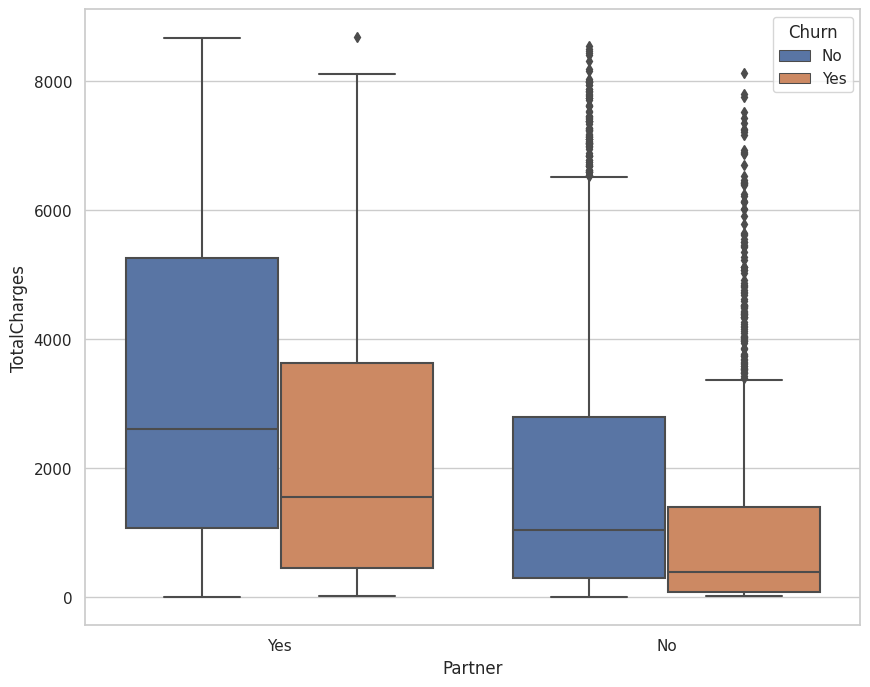

In [ ]:
plt.figure(figsize = (10,8))

sns.set(style = 'whitegrid')
sns.boxplot(x = df.Partner, y = df.TotalCharges, hue = df.Churn)

Theres is great diference between people with partners and without it. People with partner(married ones) spent much more money in the company and stay much more time. That may be because they have family, and talks more. They may have children and busy, so have less time to think about churning.

Let's confirm that possibility!

<Axes: xlabel='Partner'>

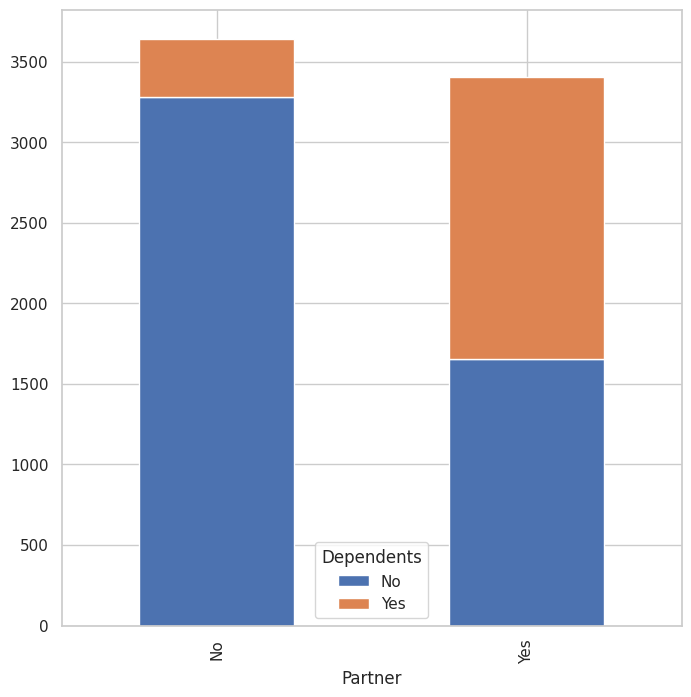

In [ ]:
pd.crosstab(df.Partner, df.Dependents).plot(kind = 'bar', stacked = True, figsize = (8,8))

That's right, people who has partners, has more dependents(children) than the single ones.

<Axes: xlabel='tenure', ylabel='count'>

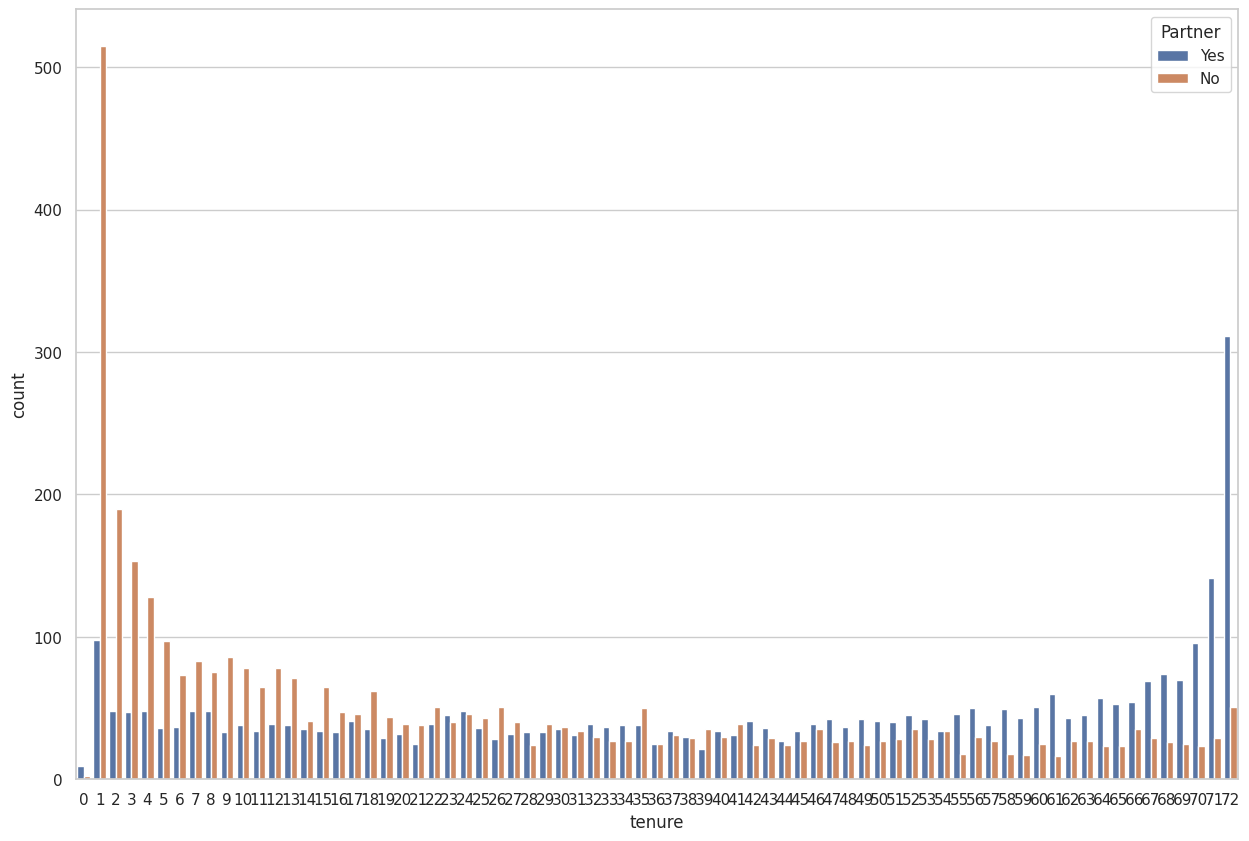

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(x=df.tenure, hue = df.Partner)

Tha above chart, confirm that people who has partner stay more time in the company.

So, that's the insights of this analysis:

* People with partner are very lucrative to the company, cause they stay more time and spent more money.


***OK, we've got some good insights exploring the demographics atributes of our clients. Lets take a look on our products ! Which one is the most lucrative ? Is that the same with the higher fidelity ?***

In [ ]:
df.InternetService.value_counts(normalize = True)

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64

21% of clients don't use internet services. Would be a nice idea explore some ways to making they use our internet services. Maybe using some clustering algorithm to discover especific characteristics to use to our favor....

From here, think that is time to slice our dataset, lets focus on clients that use internet services, but before that, lets take a closer look:

In [ ]:
pd.crosstab(df.InternetService, df.PhoneService, margins = True)

PhoneService,No,Yes,All
InternetService,,,
DSL,682,1739,2421
Fiber optic,0,3096,3096
No,0,1526,1526
All,682,6361,7043


Clients that dont use phone services, use the DSL internet service. Which means that Fiber Optic is avaliable only for those who has phone services.

For those Who use phone service, DSL still an option.

We are starting to understanding the company's product strategy...

In [ ]:
inter_no = df[df['InternetService']!='No']
inter_no.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: xlabel='InternetService', ylabel='count'>

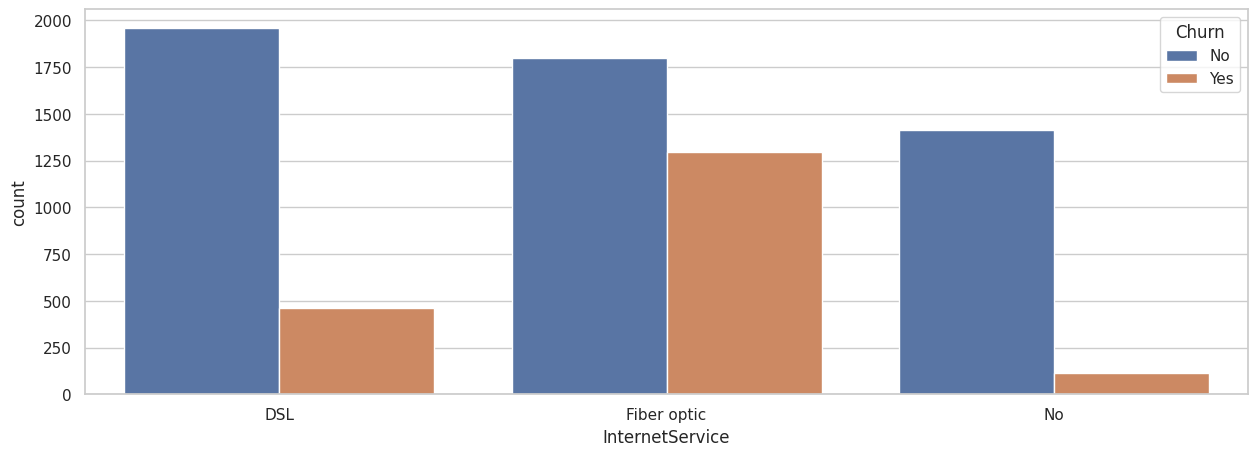

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(x=df.InternetService, hue = df.Churn)

There is a huge churn tendency in Fiber Optic Services. That mighty show a great insatisfaction with this service.

In [ ]:
df.groupby('InternetService')['TotalCharges'].mean()

InternetService
DSL            2115.411338
Fiber optic    3205.304570
No              662.604784
Name: TotalCharges, dtype: float64

Of course, the fiber optics services are expensive.

It might be interesting to know the average number of months for those who churn

Text(17.31944444444445, 0.5, 'Number of months in average')

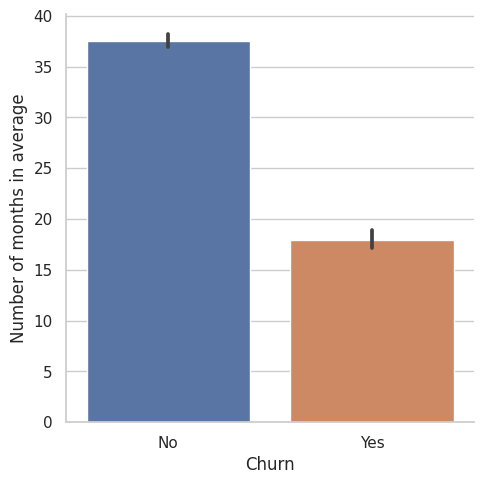

In [ ]:
sns.catplot(x='Churn', y='tenure',
               kind='bar', data=df)
plt.ylabel('Number of months in average')

In [ ]:
df.groupby('Churn').mean()

<ipython-input-43-b46e00fedf9a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Churn').mean()


,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.569965,61.265124,2549.911442
Yes,17.979133,74.441332,1531.796094


## Summary

Those tend to churn are:
* Single
* Old
* Use Fiber optics

And they are in average stay for 18 months until they leave the telco company.
